In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor,plot_tree
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, silhouette_score, confusion_matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from scipy.stats import ttest_ind
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,normalize, scale, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from xgboost import XGBClassifier,XGBRegressor,plot_importance
import json
import itertools
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

# EDA

In [2]:
features =  pd.read_parquet('features.parquet')
target =  pd.read_parquet('target.parquet')
features.shape
features.head()
target.shape
target.head()

(10000, 1000)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1990-01-01,0.943503,2.285943,-0.676534,-1.073370,0.222805,0.549741,-0.593814,2.178840,0.352440,0.201713,...,0.096125,0.953935,0.301930,-0.362019,-1.161094,0.653639,1.052906,0.412227,-0.554256,1.024348
1990-01-02,0.757759,0.420328,-0.171919,-0.256779,-0.026867,0.469453,-2.414748,-1.230617,-1.632244,-1.584294,...,1.929657,-0.209801,-0.152551,-0.696473,1.722749,0.661907,-1.248569,1.736036,0.291525,-0.461472
1990-01-03,1.321828,0.338798,-0.056767,0.831892,-0.237888,-0.280212,-0.863612,-0.339115,-0.197328,0.885977,...,-0.920220,-0.984264,0.561081,2.038433,0.073335,-0.187716,-0.597649,-0.091542,1.148625,0.413747
1990-01-04,0.791808,-1.413861,0.796525,-1.579936,1.093092,0.177056,-0.221590,0.454206,-0.883866,0.225825,...,-1.637996,-0.037544,0.299472,-1.459668,-1.006607,-1.116544,0.165441,0.946803,-0.738654,-0.376507
1990-01-05,0.703500,-1.096535,0.303689,0.841819,-1.199948,-0.336136,1.417628,0.440125,-1.757652,2.210187,...,-1.900305,-0.473095,-0.084830,-0.108897,-0.971338,-1.226582,1.515971,0.778013,1.755896,2.025973


(10000, 1)

,target
1990-01-01,0.187237
1990-01-02,0.583561
1990-01-03,0.584215
1990-01-04,-0.014664
1990-01-05,-0.896113


<AxesSubplot:>

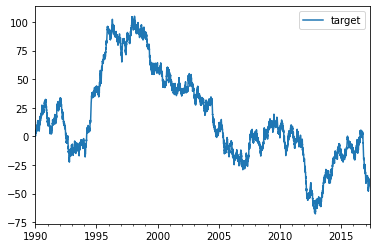

In [6]:
target.cumsum().plot()

In [14]:
corr = pd.concat([features, target], axis = 1).corr()

In [22]:
corr['target'].abs().sort_values().tail(50)

158       0.019608
892       0.019621
889       0.019635
784       0.019725
824       0.019900
163       0.019906
268       0.019988
80        0.020009
398       0.020017
595       0.020176
243       0.020454
578       0.020519
861       0.020612
641       0.020713
762       0.020737
365       0.020850
876       0.020967
193       0.021115
178       0.021234
770       0.021261
751       0.021272
920       0.021375
541       0.021826
735       0.021912
25        0.022001
173       0.022352
938       0.022477
871       0.022765
157       0.022901
386       0.022949
385       0.023184
183       0.023261
537       0.023262
472       0.023357
252       0.023501
417       0.023978
312       0.024119
260       0.024504
776       0.025291
206       0.025450
87        0.025470
184       0.025686
120       0.026627
749       0.026663
10        0.027327
775       0.028163
618       0.028843
292       0.029737
732       0.034173
target    1.000000
Name: target, dtype: float64

<AxesSubplot:>

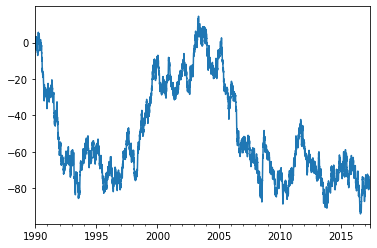

In [29]:
features['775'].cumsum().plot()

In [3]:
from sklearn.feature_selection import RFE

In [22]:
rfe = RFE(DecisionTreeRegressor(), n_features_to_select=100,verbose = 1, step = 50)
fit = rfe.fit(features.iloc[:7000,:], target.iloc[:7000,:])

Fitting estimator with 1000 features.
Fitting estimator with 950 features.
Fitting estimator with 900 features.
Fitting estimator with 850 features.
Fitting estimator with 800 features.
Fitting estimator with 750 features.
Fitting estimator with 700 features.
Fitting estimator with 650 features.
Fitting estimator with 600 features.
Fitting estimator with 550 features.
Fitting estimator with 500 features.
Fitting estimator with 450 features.
Fitting estimator with 400 features.
Fitting estimator with 350 features.
Fitting estimator with 300 features.
Fitting estimator with 250 features.
Fitting estimator with 200 features.
Fitting estimator with 150 features.


In [25]:
selected_features = features.loc[:, rfe.support_]
selected_features

,12,17,25,28,31,43,50,51,52,54,...,920,923,927,937,940,941,955,968,995,998
1990-01-01,-0.651325,1.509801,1.510890,-0.399373,-0.894506,-0.349929,0.035688,1.240499,0.707228,0.542815,...,0.474331,0.078570,0.648915,0.978681,-0.322961,-0.250491,0.985955,1.263133,0.653639,-0.554256
1990-01-02,-0.636205,0.663480,0.373260,0.297199,-1.248841,0.733281,1.347703,-0.450906,0.498928,0.304942,...,1.547478,1.586098,-0.348157,0.170166,1.388391,-0.243355,-0.777529,1.469186,0.661907,0.291525
1990-01-03,0.379628,0.135265,1.391711,-1.382852,0.627122,-0.416283,0.514938,0.798978,-1.494726,-0.205107,...,0.703480,0.705873,-0.188043,-0.319797,0.394648,1.830355,-0.078610,-1.093590,-0.187716,1.148625
1990-01-04,-1.720958,0.522120,-1.565731,1.965803,-0.719278,0.235380,-0.087729,0.663723,0.132006,-0.791177,...,-0.469025,0.375477,-0.707359,0.591552,0.782938,-0.546280,2.774443,1.801539,-1.116544,-0.738654
1990-01-05,0.085739,-0.272075,0.326067,0.587934,0.520834,1.373958,0.294015,1.735400,1.901797,1.287756,...,-0.824032,-0.646268,0.874411,0.449451,-0.151034,-0.239672,-1.261528,0.056257,-1.226582,1.755896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-14,0.133710,0.924420,-2.803098,-0.599838,-0.366034,-0.956377,1.696360,0.681463,-0.813030,0.909774,...,-2.024352,-0.139305,0.843057,-1.564934,1.718470,-0.742213,0.126605,-1.698097,0.840357,-1.615012
2017-05-15,0.315819,0.282303,-1.325134,-1.135335,1.224842,-2.043236,1.124157,-0.408465,0.438284,-0.400848,...,-0.010598,-0.444016,1.143850,1.599430,0.260088,0.864234,2.758222,-1.278638,0.328590,0.602707
2017-05-16,-1.133253,0.566296,0.045422,0.430700,0.624980,0.665514,1.418406,1.036822,0.648204,0.417884,...,0.276431,0.384092,-0.493373,-0.102622,-1.545940,-1.311321,-2.452374,-0.312587,-0.037348,0.256116
2017-05-17,-1.066824,0.555048,-0.052113,0.293978,-0.304672,-1.032803,-0.336689,2.197116,1.156322,0.028553,...,-2.424969,0.019906,0.883924,-0.075371,0.137944,1.176192,1.810065,-1.598456,0.222112,-0.973560


In [26]:
rfe = RFE(DecisionTreeRegressor(), n_features_to_select=10,verbose = 1, step = 5)
fit = rfe.fit(selected_features.iloc[:7000,:], target.iloc[:7000,:])

Fitting estimator with 100 features.
Fitting estimator with 95 features.
Fitting estimator with 90 features.
Fitting estimator with 85 features.
Fitting estimator with 80 features.
Fitting estimator with 75 features.
Fitting estimator with 70 features.
Fitting estimator with 65 features.
Fitting estimator with 60 features.
Fitting estimator with 55 features.
Fitting estimator with 50 features.
Fitting estimator with 45 features.
Fitting estimator with 40 features.
Fitting estimator with 35 features.
Fitting estimator with 30 features.
Fitting estimator with 25 features.
Fitting estimator with 20 features.
Fitting estimator with 15 features.


In [28]:
selected_features2 = selected_features.loc[:, rfe.support_]
selected_features2

,122,369,379,408,411,894,923,927,937,968
1990-01-01,1.818145,0.624252,-0.623307,-1.477395,-0.141881,-0.259247,0.078570,0.648915,0.978681,1.263133
1990-01-02,-0.927881,-0.854506,0.278484,0.793443,-0.055257,-1.813399,1.586098,-0.348157,0.170166,1.469186
1990-01-03,0.712742,1.188824,1.445052,-0.818623,0.848925,-1.313992,0.705873,-0.188043,-0.319797,-1.093590
1990-01-04,0.188879,0.251962,0.713043,0.740490,-0.356857,0.624052,0.375477,-0.707359,0.591552,1.801539
1990-01-05,-1.898230,-0.437492,0.004302,1.795827,0.429361,0.135901,-0.646268,0.874411,0.449451,0.056257
...,...,...,...,...,...,...,...,...,...,...
2017-05-14,-0.123784,-2.465077,-0.590528,-1.658310,0.439766,-1.881805,-0.139305,0.843057,-1.564934,-1.698097
2017-05-15,1.644685,-1.943789,1.159838,1.300733,0.747490,-0.308405,-0.444016,1.143850,1.599430,-1.278638
2017-05-16,0.386026,1.015020,-0.394575,-0.675965,0.885881,-0.047360,0.384092,-0.493373,-0.102622,-0.312587
2017-05-17,1.390791,0.728947,-1.079257,-0.998199,-0.198400,0.665359,0.019906,0.883924,-0.075371,-1.598456


In [29]:
rfe = RFE(DecisionTreeRegressor(), n_features_to_select=3,verbose = 1, step = 1)
fit = rfe.fit(selected_features2.iloc[:7000,:], target.iloc[:7000,:])

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


In [30]:
selected_features3 = selected_features2.loc[:, rfe.support_]
selected_features3

,408,923,927
1990-01-01,-1.477395,0.078570,0.648915
1990-01-02,0.793443,1.586098,-0.348157
1990-01-03,-0.818623,0.705873,-0.188043
1990-01-04,0.740490,0.375477,-0.707359
1990-01-05,1.795827,-0.646268,0.874411
...,...,...,...
2017-05-14,-1.658310,-0.139305,0.843057
2017-05-15,1.300733,-0.444016,1.143850
2017-05-16,-0.675965,0.384092,-0.493373
2017-05-17,-0.998199,0.019906,0.883924


In [34]:
dt_model = DecisionTreeRegressor()
dt_model.fit(selected_features3.iloc[:7000,:], target.iloc[:7000,:])
dt_modell_pred = dt_model.predict(selected_features3.iloc[7000:,:])
model_evaluation(ytrue = target.iloc[7000:,:], ypred = dt_modell_pred, model_name='Decision Tree Regression', 
                 num_observations =3000,num_features=3 )

DecisionTreeRegressor()

***Decision Tree Regression***
R squared:  -1.051578671068142
Adjusted R squared:  -1.053632988829559
MSE:  2.0264129873848358
MAE:  1.1312583936193392


In [33]:
def model_evaluation (ytrue, ypred, model_name, num_observations, num_features):
    print (f'***{model_name}***')
    r_squared = r2_score(y_pred=ypred, y_true = ytrue)
    adjusted_r_squared = 1-(1-r_squared)*(num_observations-1)/(num_observations-num_features-1)
    print(f'R squared:  {r_squared}')
    print(f'Adjusted R squared:  {adjusted_r_squared}')
    print(f'MSE:  {mean_squared_error(y_pred=ypred, y_true = ytrue)}')
    print(f'MAE:  {mean_absolute_error(y_pred=ypred, y_true = ytrue)}')


In [36]:
from sklearn.model_selection import TimeSeriesSplit

Featues and target index are well aligned

In [37]:
model = DecisionTreeRegressor()
param_search = { 
    'min_samples_leaf': [5, 10,20],
    'max_depth' : [2, 3, 5, 10, 20]
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'neg_mean_absolute_error', n_jobs = -1, verbose=1)
gsearch.fit(selected_features3.iloc[:7000,:], target.iloc[:7000,:])
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.1s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20]},
             scoring='neg_mean_absolute_error', verbose=1)

In [38]:
best_score

-0.8053441564799062

In [39]:
best_model_pred = best_model.predict(selected_features3.iloc[7000:,:])
model_evaluation(ytrue = target.iloc[7000:,:], ypred = best_model_pred, model_name=' Best Model', 
                 num_observations =3000,num_features=3 )


*** Best Model***
R squared:  -0.004295818037259425
Adjusted R squared:  -0.0053014547041858595
MSE:  0.9919766263642272
MAE:  0.790816077798269


In [22]:
#check features's distribution of min and max -> relatively within similiar range
features_stats.loc['min'].min()
features_stats.loc['min'].max()

-6.8545829937010785

-3.1818716352192684

In [23]:
features_stats.loc['max'].min()
features_stats.loc['max'].max()

3.1806385819329415

5.224528213919469

In [15]:
#check nulls -> no nulls from features
features.isnull().sum().unique()


array([0], dtype=int64)

<AxesSubplot:>

<AxesSubplot:>

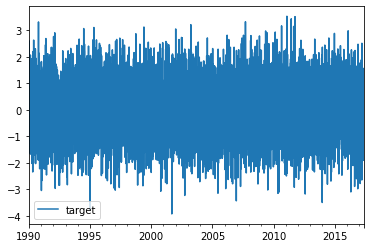

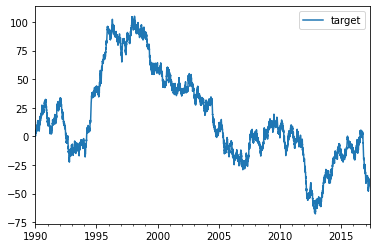

In [42]:
# visualizting time series plot
target.plot()
target.cumsum().plot()

# Data Preprocessing & Feature Engineering

## Feature Selection Approach 1 - Backward Elimination

In [64]:
# split between training and test data set
train_size = 0.7
train_len = int(len(features.index) * train_size)
test_len = int(len(features.index) * (1-train_size))
xtrain = features.iloc[:train_len]
xtest = features.iloc[train_len:]
ytrain = target.iloc[:train_len]
ytest = target.iloc[train_len:]
xtrain.shape
xtrain.head()
xtrain.tail()
xtest.shape
xtest.head()
ytrain.shape
ytest.shape

(7000, 1000)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1990-01-01,0.943503,2.285943,-0.676534,-1.073370,0.222805,0.549741,-0.593814,2.178840,0.352440,0.201713,...,0.096125,0.953935,0.301930,-0.362019,-1.161094,0.653639,1.052906,0.412227,-0.554256,1.024348
1990-01-02,0.757759,0.420328,-0.171919,-0.256779,-0.026867,0.469453,-2.414748,-1.230617,-1.632244,-1.584294,...,1.929657,-0.209801,-0.152551,-0.696473,1.722749,0.661907,-1.248569,1.736036,0.291525,-0.461472
1990-01-03,1.321828,0.338798,-0.056767,0.831892,-0.237888,-0.280212,-0.863612,-0.339115,-0.197328,0.885977,...,-0.920220,-0.984264,0.561081,2.038433,0.073335,-0.187716,-0.597649,-0.091542,1.148625,0.413747
1990-01-04,0.791808,-1.413861,0.796525,-1.579936,1.093092,0.177056,-0.221590,0.454206,-0.883866,0.225825,...,-1.637996,-0.037544,0.299472,-1.459668,-1.006607,-1.116544,0.165441,0.946803,-0.738654,-0.376507
1990-01-05,0.703500,-1.096535,0.303689,0.841819,-1.199948,-0.336136,1.417628,0.440125,-1.757652,2.210187,...,-1.900305,-0.473095,-0.084830,-0.108897,-0.971338,-1.226582,1.515971,0.778013,1.755896,2.025973


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2009-02-25,0.080533,0.256312,0.559213,1.508573,-0.952171,-0.063566,-2.106840,1.232395,1.730807,-1.178106,...,0.020103,1.339799,0.368437,-1.492337,1.643798,1.277063,0.327296,0.701744,0.542135,-1.219524
2009-02-26,-0.540102,-1.303380,-0.708246,-0.882363,0.587085,0.489231,-0.034246,-1.309256,-1.398321,0.729492,...,0.039901,-0.068265,0.573422,-0.426901,-2.334531,0.265245,0.620735,-1.373623,0.601200,0.966787
2009-02-27,0.361646,-2.647456,0.687982,2.068186,1.602446,0.698092,0.875561,-1.077449,-0.402130,0.377512,...,-0.008212,1.080585,-0.493124,-0.357810,0.675277,-2.370957,-0.081190,2.212157,-0.707208,-0.943612
2009-02-28,2.320730,-1.205485,0.891637,0.290391,-1.215879,1.059935,-0.714370,0.033922,-0.347714,0.185106,...,0.876502,1.333054,0.118427,-0.167022,-0.740728,-0.122609,1.360370,-1.604320,0.187666,0.184501
2009-03-01,-0.489193,1.548652,-2.301989,-0.230718,-1.228268,-0.208020,1.476721,-1.531453,-0.298059,-0.735896,...,-0.934719,2.551681,0.045813,0.646710,-0.853424,0.314131,-2.215948,0.488905,-0.555551,-1.060801


(3000, 1000)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2009-03-02,0.959959,-0.135630,-0.719417,0.633197,0.162678,0.954001,0.218915,-1.077025,0.337764,2.078492,...,-0.226721,-0.671868,1.767070,-0.334827,-0.043890,-0.037443,-0.318301,1.047346,-0.008123,-0.391694
2009-03-03,0.151288,0.577267,0.582642,0.868066,0.967827,-0.705060,-1.429996,-0.365355,1.430644,-1.010319,...,-0.514840,-0.477410,-0.585001,1.156334,1.500593,0.622640,1.537334,-0.996524,0.136070,-1.243357
2009-03-04,-0.762183,0.558467,1.570452,-0.161511,0.755039,0.066518,-0.123605,-0.244742,0.257167,0.235104,...,-0.238711,0.095388,0.171662,-0.638782,-1.391247,0.012936,-0.526739,-0.115704,2.124018,-0.842850
2009-03-05,0.142225,0.432812,0.334751,1.324464,1.227664,-0.825051,-0.250942,0.842679,0.600740,0.144661,...,0.035249,-0.137280,-1.828886,-0.345241,-1.724927,-0.103295,0.111466,-0.023077,-1.791797,-0.386819
2009-03-06,-0.320024,0.170332,-0.892417,0.113862,0.292723,-1.074066,-0.347674,1.159304,-1.054585,-1.011236,...,0.781884,-0.029404,-0.028342,-0.613715,0.788471,-0.821906,0.271830,-1.952343,0.718141,0.755541


(7000, 1)

(3000, 1)

Given that there are 1000 features in the dataset, and I dont have any prior which features should be included in the modelling, so I used backward elimination approach to select features. It starts with considering all the features in a simple model and removes the least significant feature iteratively.

In [30]:
# model evaluationn fundtion
def model_evaluation (ytrue, ypred, model_name, num_observations, num_features):
    print (f'***{model_name}***')
    r_squared = r2_score(y_pred=ypred, y_true = ytrue)
    adjusted_r_squared = 1-(1-r_squared)*(num_observations-1)/(num_observations-num_features-1)
    print(f'R squared:  {r_squared}')
    print(f'Adjusted R squared:  {adjusted_r_squared}')
    print(f'MSE:  {mean_squared_error(y_pred=ypred, y_true = ytrue)}')
    print(f'MAE:  {mean_absolute_error(y_pred=ypred, y_true = ytrue)}')

For model evaluation metrics, I output R squared, adjusted R squared, MSE, and MAE. Given that we want to see how well the predicted value can predict target value, and MAE is generally more robust to outliers, I choose MAE as the model evaluation metric, while keep other metrics as reference points.

In [65]:
# fit all features in a linear model to see if any less important features can be removed
linear_model = LinearRegression()
linear_model.fit(xtrain, ytrain)
linear_model_pred = linear_model.predict(xtest)
model_evaluation(ytrue = ytest, ypred = linear_model_pred, model_name='Linear Regression', 
                 num_observations =xtest.shape[0],num_features=xtest.shape[1] )

LinearRegression()

***Linear Regression***
R squared:  -0.17344157970784213
Adjusted R squared:  -0.7604558767102645
MSE:  1.1590475620509946
MAE:  0.8594806641537901


In [66]:
linear_model_feature_importance = pd.DataFrame(linear_model.coef_, columns = xtest.columns, index = ['Coefficient']).T
linear_model_feature_importance.sort_values('Coefficient')

,Coefficient
776,-0.054882
206,-0.040953
10,-0.033684
463,-0.031403
81,-0.030674
...,...
211,0.033871
292,0.033934
732,0.037534
871,0.037993


<AxesSubplot:title={'center':'ytest Cumsum Plot'}>

<AxesSubplot:title={'center':'linear_model_pred Cumsum Plot'}>

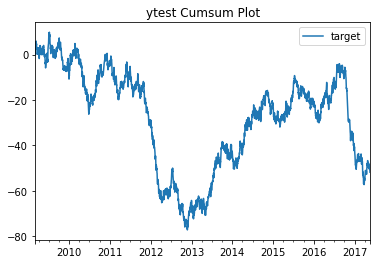

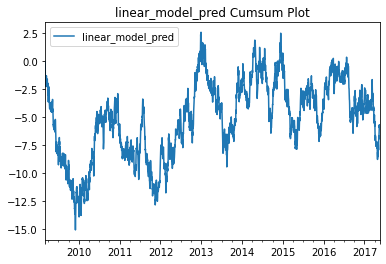

In [67]:
linear_model_pred_df = pd.DataFrame(linear_model_pred, columns = ['linear_model_pred'], index = ytest.index)

ytest.cumsum().plot(title = 'ytest Cumsum Plot')
linear_model_pred_df.cumsum().plot(title = 'linear_model_pred Cumsum Plot')

Each feature has coefficient of roughly 0, which makes it hard to remove any features. In addition, the results also tells us linear model is not a good fit. With that, I further explored some non-linear models.

In [ ]:
# fit all features in Decision Trees

In [79]:
dt_model = DecisionTreeRegressor()
dt_model.fit(xtrain, ytrain)
dt_modell_pred = dt_model.predict(xtest)
model_evaluation(ytrue = ytest, ypred = dt_modell_pred, model_name='Decision Tree Regression', 
                 num_observations =xtest.shape[0],num_features=xtest.shape[1] )

DecisionTreeRegressor()

***Decision Tree Regression***
R squared:  -0.9521423060056222
Adjusted R squared:  -1.9287017387247927
MSE:  1.9281963581994093
MAE:  1.0991799863008054


C:\Users\sarahwang\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

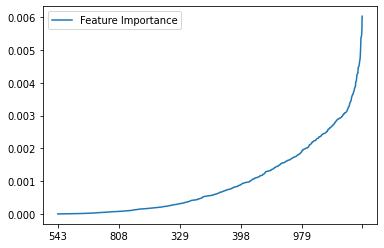

In [263]:
dt_model_feature_importance = pd.DataFrame(dt_model.feature_importances_, index = xtest.columns, columns = ['Feature Importance'])
dt_model_feature_importance = dt_model_feature_importance.sort_values('Feature Importance')
dt_model_feature_importance.plot()


After sorting features importance, features after 979 seems to come with higher feature importance. Therefore, I choose feature 979 as the cutoff points, and select features with larger feature importancen than feature 979. That gives us 200 features in total. It is a bit arbitrary in terms of the number of features selected. There is a tradeoff between selecting too much and too few number of features. If too few features are selected, model will be underfitting and not be able to pick up some importance variation from the training data. However, if too much features are selected, model will likely pick up noise from training data and not generalize well to test data. If more time is given, I can iterate more on the total number of features selected. 

The cumsum plot comparison between test data and predicted data is below. Although predicted data is not a perfect match of test data, it is able to pick up the overall trend, and is a leading indicator of the trough happened in 2013 in test dataset.

<AxesSubplot:title={'center':'ytest Cumsum Plot'}>

<AxesSubplot:title={'center':'decision_tree_model_pred Cumsum Plot'}>

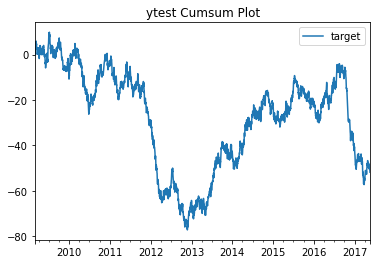

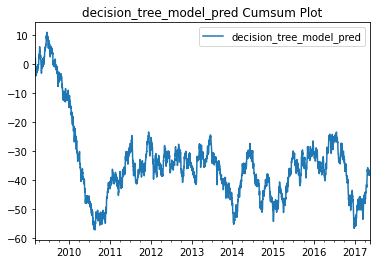

In [81]:
dt_model_pred_df = pd.DataFrame(dt_modell_pred, columns = ['decision_tree_model_pred'], index = ytest.index)

ytest.cumsum().plot(title = 'ytest Cumsum Plot')
dt_model_pred_df.cumsum().plot(title = 'decision_tree_model_pred Cumsum Plot')

Based on finding above, I narrowed down to 200 features, and conduct time series cross validation and hyperperamerter tuning.

In [272]:
dt_variables = dt_model_feature_importance.loc['979':].index
dt_variables

Index(['979', '46', '202', '433', '665', '7', '669', '279', '310', '208',
       ...
       '12', '63', '360', '345', '459', '575', '606', '8', '280', '759'],
      dtype='object', length=200)

In [281]:
dt_model = DecisionTreeRegressor()
dt_model.fit(xtrain[dt_variables], ytrain)
dt_modell_pred = dt_model.predict(xtest[dt_variables])
model_evaluation(ytrue = ytest, ypred = dt_modell_pred, model_name='Decision Tree Regression - Feature Selection', 
                 num_observations =xtest.shape[0],num_features=len(dt_variables) )

DecisionTreeRegressor()

***Decision Tree Regression - Feature Selection***
R squared:  -1.01668382108633
Adjusted R squared:  -1.160784129845625
MSE:  1.9919461749768212
MAE:  1.1268329554391587


<AxesSubplot:title={'center':'ytest Cumsum Plot'}>

<AxesSubplot:title={'center':'decision_tree_model_feature_selected Cumsum Plot'}>

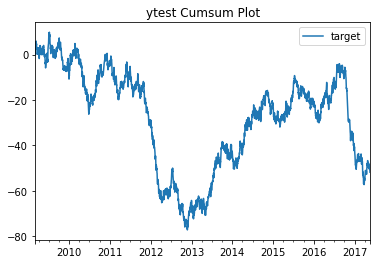

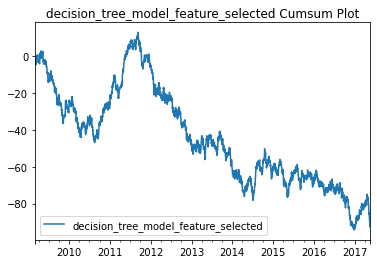

In [282]:
dt_modell_pred = pd.DataFrame(dt_modell_pred, columns = ['decision_tree_model_feature_selected'], index = ytest.index)

ytest.cumsum().plot(title = 'ytest Cumsum Plot')
dt_modell_pred.cumsum().plot(title = 'decision_tree_model_feature_selected Cumsum Plot')

In [275]:
model = DecisionTreeRegressor()
param_search = { 
    'min_samples_leaf': [5, 10,20],
    'max_depth' : [2, 3, 5, 10, 20]
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2', n_jobs = -1, verbose=1)
gsearch.fit(xtrain[dt_variables], ytrain)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    2.6s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.3s finished


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
             estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20]},
             scoring='r2', verbose=1)

In [276]:
best_score

-0.0234340931793679

In [277]:
best_model

DecisionTreeRegressor(max_depth=2, min_samples_leaf=20)

In [288]:
best_model_dt_pred = gsearch.predict(xtest[dt_variables])
model_evaluation(ytrue = ytest, ypred = best_model_dt_pred, model_name='Decision Tree Regression - Tuned', 
                 num_observations =xtest.shape[0],num_features=(len(dt_variables)) )

***Decision Tree Regression - Tuned***
R squared:  -0.008436640082603253
Adjusted R squared:  -0.08049356327535806
MSE:  0.9960666550282343
MAE:  0.7914753593054723


<AxesSubplot:title={'center':'ytest Cumsum Plot'}>

<AxesSubplot:title={'center':'decision_tree_model_tuned Cumsum Plot'}>

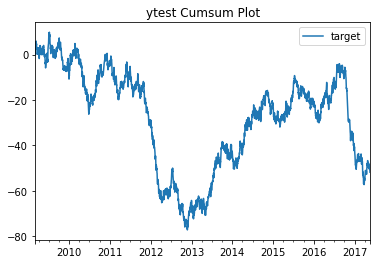

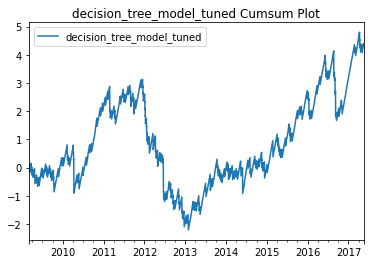

In [289]:
best_model_dt_pred = pd.DataFrame(best_model_dt_pred, columns = ['decision_tree_model_tuned'], index = ytest.index)

ytest.cumsum().plot(title = 'ytest Cumsum Plot')
best_model_dt_pred.cumsum().plot(title = 'decision_tree_model_tuned Cumsum Plot')

<AxesSubplot:>

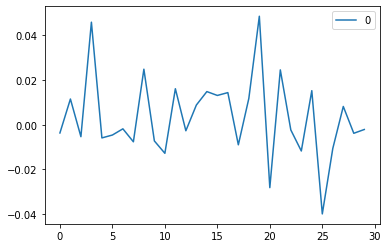

In [297]:
correlation = []
for day in range(30):
    best_model_dt_pred_shift = best_model_dt_pred.shift(-day)
    corr = pd.concat([ytest,best_model_dt_pred_shift], axis = 1).corr()
    corr = corr.iloc[0, 1]
    correlation.append(corr)
pd.DataFrame(correlation).plot()

The hyperparameter tuning gives us max_depth=2, min_samples_leaf=20. After feature selection, MAE is increased from 1.09 to 1.12, which is expected because the total number of features are reduced significantly. However, after hyperparamter tuning, MAE is decreased from 1.12 to 0.79, or ~30%, which indicates very good improvement. 

By comparing the time series cumsum charts, the predicted value is much closer than the target value, with a trough around 2013, and improvements afterwards.

By comparing correlation by shifting predicted value ahead to understand how many days is predicted value ahead of the target value, we can see the correlation is largest when predicted value is shifted ahead by 3 days.

## Feature Selection Approach 2 - PCA

In [82]:
# Random Forest

In [84]:
rf_model = RandomForestRegressor(n_jobs=-1, verbose=1)
rf_model.fit(xtrain, ytrain)
rf_model_pred = rf_model.predict(xtest)
model_evaluation(ytrue = ytest, ypred = rf_model_pred, model_name='Random Forest Regression', 
                 num_observations =xtest.shape[0],num_features=xtest.shape[1] )

C:\Users\sarahwang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomForestRegressor(n_jobs=-1, verbose=1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


***Random Forest Regression***
R squared:  -0.00831710635218541
Adjusted R squared:  -0.512727864907556
MSE:  0.9959485875579661
MAE:  0.7923793042923338


In [85]:
rf_model_feature_importance = pd.DataFrame(rf_model.feature_importances_, index = xtest.columns, columns = ['Feature Importance'])
rf_model_feature_importance.sort_values('Feature Importance')

,Feature Importance
145,0.000588
557,0.000592
677,0.000595
187,0.000600
121,0.000606
...,...
575,0.001784
826,0.001808
463,0.001848
68,0.002069


<AxesSubplot:title={'center':'ytest Cumsum Plot'}>

<AxesSubplot:title={'center':'random_forest_model_pred Cumsum Plot'}>

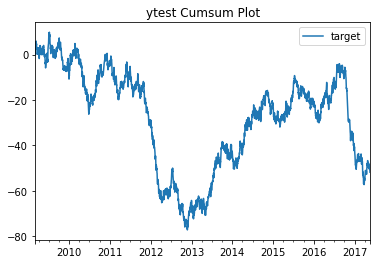

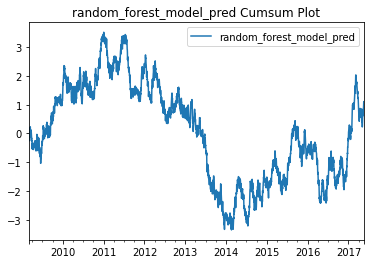

In [86]:
rf_model_pred_df = pd.DataFrame(rf_model_pred, columns = ['random_forest_model_pred'], index = ytest.index)

ytest.cumsum().plot(title = 'ytest Cumsum Plot')
rf_model_pred_df.cumsum().plot(title = 'random_forest_model_pred Cumsum Plot')

In [87]:
# Dimension Reduction

array([[ 0.17945755, -1.12927502, -0.59684829, ..., -0.60144892,
        -0.44063674, -0.84106277],
       [ 1.03235117, -0.34367945, -0.08029337, ..., -0.53606011,
         0.5573338 , -1.03119749],
       [-1.42084209,  1.83852814, -0.09070276, ...,  0.4935402 ,
        -0.34092054,  0.47135213],
       ...,
       [ 1.83934379,  0.86269011, -2.32162809, ..., -1.18960517,
         0.3229724 ,  0.47536908],
       [ 1.48383014, -0.78668168,  0.67887347, ...,  0.57471618,
        -0.7546603 ,  1.45531898],
       [ 4.06684337,  0.82650281, -1.54947147, ..., -0.80824267,
         0.38909102,  1.03221562]])

<AxesSubplot:>

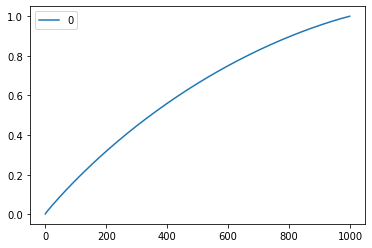

In [88]:
pca = PCA()
#scale()
pca.fit_transform(xtrain)
explained_variance = pca.explained_variance_ratio_.cumsum()
pd.DataFrame(explained_variance).plot()

<AxesSubplot:>

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC391,PC392,PC393,PC394,PC395,PC396,PC397,PC398,PC399,PC400
1990-01-01,0.252953,-1.098897,-0.574897,0.036611,-2.138887,1.528684,2.492806,-2.830132,-1.558161,0.834826,...,-0.893832,-0.949652,-0.816841,0.441654,-1.318831,0.073631,-0.621655,2.321012,0.883248,-0.247504
1990-01-02,1.030264,-0.337603,-0.061139,-1.543160,-0.795320,0.307204,-1.304508,-0.337957,2.194081,0.671790,...,-0.249587,-0.588141,-0.281783,-0.410675,-0.021433,1.403078,1.685476,0.669435,-0.468406,1.542834
1990-01-03,-1.430764,1.799173,-0.077983,0.828443,0.318469,0.687379,-1.786107,1.659283,1.176488,0.605406,...,-0.448824,-0.036060,-0.257115,0.195750,0.160328,0.303319,-1.880752,0.272730,0.558066,-0.822875
1990-01-04,-0.351997,-2.516385,-1.633010,0.889283,0.394200,-1.803610,0.211354,-0.035988,-1.440795,-0.027177,...,0.257619,-0.473118,0.190201,0.231085,-1.418744,0.680000,-0.292671,0.212459,-0.106537,-1.075538
1990-01-05,2.468003,1.763358,0.863900,0.290713,-0.965205,0.608781,-1.028250,0.299138,-0.694749,1.266748,...,0.528094,-2.504844,0.079009,-1.028226,-0.715864,-1.299968,-0.078931,1.462993,-0.253310,-0.892822


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1990-01-01,0.943503,2.285943,-0.676534,-1.073370,0.222805,0.549741,-0.593814,2.178840,0.352440,0.201713,...,0.096125,0.953935,0.301930,-0.362019,-1.161094,0.653639,1.052906,0.412227,-0.554256,1.024348
1990-01-02,0.757759,0.420328,-0.171919,-0.256779,-0.026867,0.469453,-2.414748,-1.230617,-1.632244,-1.584294,...,1.929657,-0.209801,-0.152551,-0.696473,1.722749,0.661907,-1.248569,1.736036,0.291525,-0.461472
1990-01-03,1.321828,0.338798,-0.056767,0.831892,-0.237888,-0.280212,-0.863612,-0.339115,-0.197328,0.885977,...,-0.920220,-0.984264,0.561081,2.038433,0.073335,-0.187716,-0.597649,-0.091542,1.148625,0.413747
1990-01-04,0.791808,-1.413861,0.796525,-1.579936,1.093092,0.177056,-0.221590,0.454206,-0.883866,0.225825,...,-1.637996,-0.037544,0.299472,-1.459668,-1.006607,-1.116544,0.165441,0.946803,-0.738654,-0.376507
1990-01-05,0.703500,-1.096535,0.303689,0.841819,-1.199948,-0.336136,1.417628,0.440125,-1.757652,2.210187,...,-1.900305,-0.473095,-0.084830,-0.108897,-0.971338,-1.226582,1.515971,0.778013,1.755896,2.025973


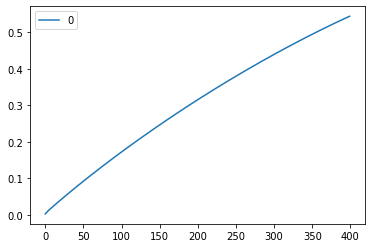

In [121]:
n_components = 400 #600
pca = PCA(n_components=n_components)
#scale()
xtrain_pca = pca.fit_transform(xtrain)
explained_variance = pca.explained_variance_ratio_.cumsum()
pd.DataFrame(explained_variance).plot()
xtrain_pca= pd.DataFrame(xtrain_pca, index = xtrain.index, columns = [f'PC{i}' for i in range(1, n_components+1)])
xtrain_pca.head()
xtrain.head()

In [122]:
xtest_pca =pca.transform(xtest)

xtest_pca= pd.DataFrame(xtest_pca, index = xtest.index, columns = [f'PC{i}' for i in range(1, n_components+1)])
xtest_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC391,PC392,PC393,PC394,PC395,PC396,PC397,PC398,PC399,PC400
2009-03-02,-0.072211,-0.287085,-1.872718,0.222307,-0.241807,-1.274396,-0.199777,-0.005221,1.691172,-1.080143,...,-0.985289,0.632186,-0.010197,0.365642,1.103159,-0.136308,-1.113103,-1.575481,0.357797,0.879503
2009-03-03,0.957456,-1.098181,-2.561117,2.909922,0.040098,0.381405,-1.552356,0.817879,0.890737,0.489488,...,-0.581577,-0.599896,0.287347,1.404269,1.145281,-0.547011,-0.435171,1.124710,1.989364,-2.008779
2009-03-04,-0.263617,-0.549416,-0.033679,-0.097644,-2.574332,0.136702,-1.295529,-0.416146,-1.931950,-0.622131,...,0.552243,-1.652632,0.164179,1.230871,1.463661,-0.525304,0.826533,2.289825,-0.128944,-0.275610
2009-03-05,-1.141023,0.942032,-0.706696,-0.968742,-0.194228,0.818174,-0.658355,0.888473,-0.979949,-1.492108,...,-0.201191,-0.314172,-0.926733,0.297268,-0.634070,1.203263,-0.452858,-0.823014,0.745264,-0.951247
2009-03-06,1.350606,-0.519314,-1.193027,1.237281,-1.957851,-0.631425,-0.406732,-0.416530,-0.226963,-0.002865,...,-0.431948,1.400266,0.898876,1.121074,-0.230025,0.140005,0.661312,-1.745579,-0.291252,-0.508260


In [123]:
rf_model = RandomForestRegressor(n_estimators=200,n_jobs=-1, verbose=1)
rf_model.fit(xtrain_pca, ytrain)
rf_model_pca_pred = rf_model.predict(xtest_pca)
model_evaluation(ytrue = ytest, ypred = rf_model_pca_pred, model_name='Random Forest Regression with PCA', 
                 num_observations =xtest_pca.shape[0],num_features=xtest_pca.shape[1] )

C:\Users\sarahwang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.7min finished


RandomForestRegressor(n_estimators=200, n_jobs=-1, verbose=1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


***Random Forest Regression with PCA***
R squared:  -0.011079872952292735
Adjusted R squared:  -0.16669047286799765
MSE:  0.998677464689768
MAE:  0.7958436254138199


In [124]:
rf_model_feature_importance = pd.DataFrame(rf_model.feature_importances_, index = xtest_pca.columns, columns = ['Feature Importance'])
rf_model_feature_importance.sort_values('Feature Importance')

,Feature Importance
PC365,0.001774
PC186,0.001880
PC222,0.001906
PC356,0.001920
PC374,0.001935
...,...
PC211,0.003465
PC133,0.003499
PC241,0.003555
PC375,0.003570


<AxesSubplot:title={'center':'ytest Cumsum Plot'}>

<AxesSubplot:title={'center':'random_forest_model_pca_pred Cumsum Plot'}>

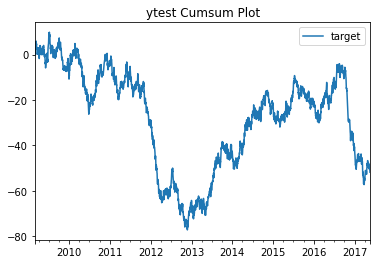

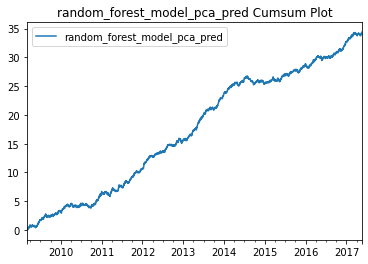

In [125]:
rf_model_pca_pred_df = pd.DataFrame(rf_model_pca_pred, columns = ['random_forest_model_pca_pred'], index = ytest.index)

ytest.cumsum().plot(title = 'ytest Cumsum Plot')
rf_model_pca_pred_df.cumsum().plot(title = 'random_forest_model_pca_pred Cumsum Plot')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


<AxesSubplot:title={'center':'ytrain Cumsum Plot'}>

<AxesSubplot:title={'center':'random_forest_model_pca_pred_train Cumsum Plot'}>

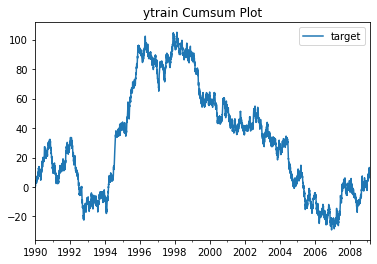

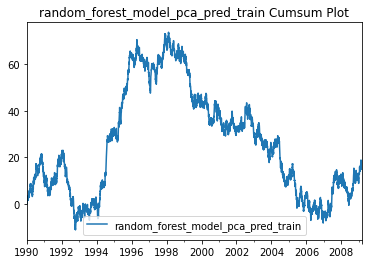

In [126]:
rf_model_pca_pred_train = rf_model.predict(xtrain_pca)
rf_model_pca_pred_train_df = pd.DataFrame(rf_model_pca_pred_train, columns = ['random_forest_model_pca_pred_train'], index = ytrain.index)

ytrain.cumsum().plot(title = 'ytrain Cumsum Plot')
rf_model_pca_pred_train_df.cumsum().plot(title = 'random_forest_model_pca_pred_train Cumsum Plot')

In [116]:
model_evaluation(ytrue = ytrain, ypred = rf_model_pca_pred_train, model_name='Random Forest Regression with PCA', 
                 num_observations =xtest_pca.shape[0],num_features=xtest_pca.shape[1] )

***Random Forest Regression with PCA***
R squared:  0.8576658638749923
Adjusted R squared:  0.8220674971909554
MSE:  0.14125849772609048
MAE:  0.2981964915661439


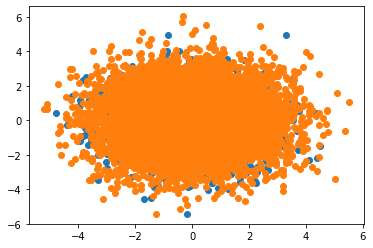

In [129]:
plt.scatter(xtest_pca['PC1'], xtest_pca['PC2'])
plt.scatter(xtrain_pca['PC1'], xtrain_pca['PC2'])

In [127]:
# kmeans

In [141]:
inertia_list = []
k_range = np.arange(2, 30)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(xtrain_pca)
    inertia = kmeans_model.inertia_
    inertia_list.append(inertia)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

KMeans(n_clusters=11)

KMeans(n_clusters=12)

KMeans(n_clusters=13)

KMeans(n_clusters=14)

KMeans(n_clusters=15)

KMeans(n_clusters=16)

KMeans(n_clusters=17)

KMeans(n_clusters=18)

KMeans(n_clusters=19)

KMeans(n_clusters=20)

KMeans(n_clusters=21)

KMeans(n_clusters=22)

KMeans(n_clusters=23)

KMeans(n_clusters=24)

KeyboardInterrupt: 

<AxesSubplot:>

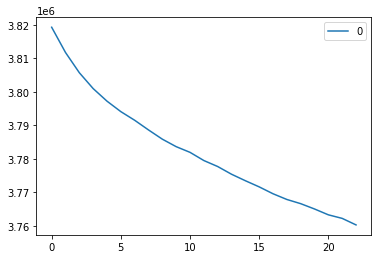

In [143]:
pd.DataFrame(inertia_list).plot()

In [144]:
inertia_list = []
k_range = np.arange(2, 30)
for k in k_range:
    kmeans_model = KMeans(n_clusters = k)
    kmeans_model.fit(xtrain)
    inertia = kmeans_model.inertia_
    inertia_list.append(inertia)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

KMeans(n_clusters=11)

KMeans(n_clusters=12)

KMeans(n_clusters=13)

KMeans(n_clusters=14)

KMeans(n_clusters=15)

KMeans(n_clusters=16)

KMeans(n_clusters=17)

KMeans(n_clusters=18)

KMeans(n_clusters=19)

KMeans(n_clusters=20)

KMeans(n_clusters=21)

KMeans(n_clusters=22)

KMeans(n_clusters=23)

KMeans(n_clusters=24)

KMeans(n_clusters=25)

KMeans(n_clusters=26)

KMeans(n_clusters=27)

KMeans(n_clusters=28)

KMeans(n_clusters=29)

<AxesSubplot:>

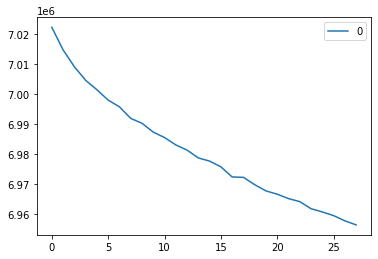

In [145]:
pd.DataFrame(inertia_list).plot()

In [149]:
kmeans_model = KMeans(n_clusters = 30)
kmeans_model.fit(xtrain.T)
labels = kmeans_model.labels_


KMeans(n_clusters=30)

In [153]:
xtrain_labels = xtrain.T.copy()
xtrain_labels['label'] = labels
xtrain_labels_count = xtrain_labels.groupby('label').count()
xtrain_labels_count.iloc[:, 0].sort_values()

label
27      1
12      1
0       2
24      2
20      3
2       5
19      8
17      8
21      9
11     10
22     11
23     14
8      15
29     16
25     17
4      20
7      21
16     22
26     22
15     25
5      27
18     28
14     45
6      51
1      56
10     68
9      94
3     125
28    135
13    139
Name: 1990-01-01 00:00:00, dtype: int64

In [158]:
xtrain_reduced = xtrain_labels[xtrain_labels.label.isin([13, 28, 3, 9, 10])]
xtrain_reduced.drop('label', axis = 1, inplace = True)
xtrain_reduced = xtrain_reduced.T
xtrain_reduced

C:\Users\sarahwang\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,3,4,7,8,9,11,14,15,17,19,...,981,982,987,989,992,994,996,997,998,999
1990-01-01,-1.073370,0.222805,2.178840,0.352440,0.201713,-1.619740,-2.083505,1.988972,1.509801,-0.315817,...,0.609255,-0.392841,-0.466055,0.056943,0.301930,-1.161094,1.052906,0.412227,-0.554256,1.024348
1990-01-02,-0.256779,-0.026867,-1.230617,-1.632244,-1.584294,-0.233060,-0.817935,0.211268,0.663480,0.695291,...,-0.035107,0.021477,0.274065,0.362757,-0.152551,1.722749,-1.248569,1.736036,0.291525,-0.461472
1990-01-03,0.831892,-0.237888,-0.339115,-0.197328,0.885977,1.302981,1.080883,-0.600290,0.135265,-1.883264,...,-2.535799,-0.303669,-0.358318,-0.163305,0.561081,0.073335,-0.597649,-0.091542,1.148625,0.413747
1990-01-04,-1.579936,1.093092,0.454206,-0.883866,0.225825,0.496821,0.770359,-0.699038,0.522120,1.500527,...,0.310917,-0.612321,1.127159,0.102909,0.299472,-1.006607,0.165441,0.946803,-0.738654,-0.376507
1990-01-05,0.841819,-1.199948,0.440125,-1.757652,2.210187,1.459294,0.725189,-0.181443,-0.272075,1.916061,...,-1.133588,0.071513,0.091038,-0.833624,-0.084830,-0.971338,1.515971,0.778013,1.755896,2.025973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-02-25,1.508573,-0.952171,1.232395,1.730807,-1.178106,-0.366946,-1.294825,1.641657,0.243761,-0.697192,...,1.361928,-0.652008,-0.689432,2.210430,0.368437,1.643798,0.327296,0.701744,0.542135,-1.219524
2009-02-26,-0.882363,0.587085,-1.309256,-1.398321,0.729492,-0.151036,-0.728650,1.020827,-1.575942,-0.383296,...,2.065862,-0.871917,-0.381753,-0.255949,0.573422,-2.334531,0.620735,-1.373623,0.601200,0.966787
2009-02-27,2.068186,1.602446,-1.077449,-0.402130,0.377512,-0.793090,-0.198759,-1.185295,1.655211,0.226503,...,1.007902,0.916382,0.286646,-0.126440,-0.493124,0.675277,-0.081190,2.212157,-0.707208,-0.943612
2009-02-28,0.290391,-1.215879,0.033922,-0.347714,0.185106,-1.770302,-1.618406,-1.203971,-1.210419,-0.214449,...,0.328384,0.408026,0.492742,-1.887624,0.118427,-0.740728,1.360370,-1.604320,0.187666,0.184501


In [159]:
xtest_reduced = xtest[xtrain_reduced.columns]
xtest_reduced

,3,4,7,8,9,11,14,15,17,19,...,981,982,987,989,992,994,996,997,998,999
2009-03-02,0.633197,0.162678,-1.077025,0.337764,2.078492,-0.116644,-0.416895,0.387205,0.116252,0.018817,...,-1.143303,-0.355519,1.429064,-0.266782,1.767070,-0.043890,-0.318301,1.047346,-0.008123,-0.391694
2009-03-03,0.868066,0.967827,-0.365355,1.430644,-1.010319,-1.154155,0.674508,-2.237751,0.348557,0.970387,...,-0.936723,-1.208292,1.013457,0.938669,-0.585001,1.500593,1.537334,-0.996524,0.136070,-1.243357
2009-03-04,-0.161511,0.755039,-0.244742,0.257167,0.235104,-2.729477,0.803914,0.331969,0.695651,-1.287447,...,1.973983,0.092194,-0.293603,-0.430303,0.171662,-1.391247,-0.526739,-0.115704,2.124018,-0.842850
2009-03-05,1.324464,1.227664,0.842679,0.600740,0.144661,-0.235397,-0.547309,-0.215162,-0.612329,-1.719004,...,-0.364917,0.914986,-2.362702,1.193783,-1.828886,-1.724927,0.111466,-0.023077,-1.791797,-0.386819
2009-03-06,0.113862,0.292723,1.159304,-1.054585,-1.011236,-1.011115,-0.693313,-0.307532,-0.143998,0.924837,...,0.963042,-0.200552,-0.845065,0.274139,-0.028342,0.788471,0.271830,-1.952343,0.718141,0.755541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-14,1.618249,-0.587973,0.941966,-1.240647,1.928053,0.673043,0.187674,-2.334719,0.924420,-1.263215,...,0.307166,-0.183952,-0.711552,1.845176,-1.307832,-1.131362,2.206937,-0.541077,-1.615012,-1.042991
2017-05-15,-0.210056,-1.857202,-0.167864,1.224130,-1.128872,-1.180895,-0.046607,0.632365,0.282303,0.652092,...,0.103082,-0.273331,0.270145,-1.256402,-2.567323,2.331358,1.175258,0.787926,0.602707,0.699915
2017-05-16,-1.118373,-0.998389,-1.638973,0.077246,-2.314892,0.493531,1.992560,-1.095097,0.566296,-0.003121,...,0.339656,-0.307150,0.407502,-0.935296,1.181961,0.536213,0.691693,0.322477,0.256116,-2.238384
2017-05-17,-1.490873,-0.026855,-0.575125,2.543769,-0.581292,-1.464032,-0.389449,0.910078,0.555048,-0.676055,...,0.601294,-0.201846,-0.131745,-0.366328,-0.658146,0.245362,0.248544,-0.943414,-0.973560,-0.355406


In [164]:
rf_model = RandomForestRegressor(n_jobs=-1, verbose=1)
rf_model.fit(xtrain_reduced, ytrain)
rf_model_reduced_pred = rf_model.predict(xtest_reduced)
model_evaluation(ytrue = ytest, ypred = rf_model_reduced_pred, model_name='Random Forest Regression with Dim Reduction', 
                 num_observations =xtrain_reduced.shape[0],num_features=xtrain_reduced.shape[1] )

C:\Users\sarahwang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomForestRegressor(n_jobs=-1, verbose=1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


***Random Forest Regression with Dim Reduction***
R squared:  -0.012000067804301962
Adjusted R squared:  -0.10018460306963495
MSE:  0.9995863719743546
MAE:  0.7962686914865038


In [165]:
rf_model_feature_importance = pd.DataFrame(rf_model.feature_importances_, index = xtest_reduced.columns, columns = ['Feature Importance'])
rf_model_feature_importance.sort_values('Feature Importance')

,Feature Importance
111,0.000997
276,0.001250
564,0.001268
773,0.001271
237,0.001275
...,...
292,0.002702
826,0.002713
363,0.002774
463,0.003014


<AxesSubplot:title={'center':'ytest Cumsum Plot'}>

<AxesSubplot:title={'center':'random_forest_model_reduced_pred Cumsum Plot'}>

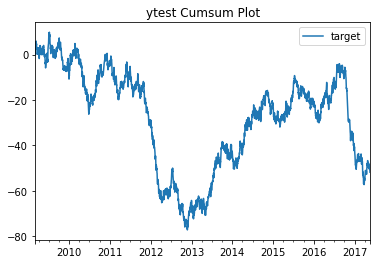

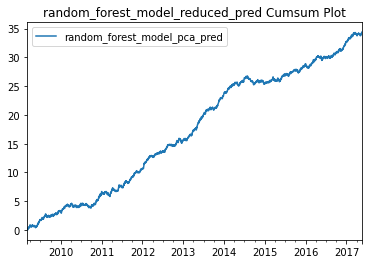

In [166]:
rf_model_reduced_pred_df = pd.DataFrame(rf_model_reduced_pred, columns = ['random_forest_model_reduced_pred'], index = ytest.index)

ytest.cumsum().plot(title = 'ytest Cumsum Plot')
rf_model_pca_pred_df.cumsum().plot(title = 'random_forest_model_reduced_pred Cumsum Plot')

In [169]:
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
tscv = TimeSeriesSplit(n_splits = 4)
rmse = []
for train_index, test_index in tscv.split(features):
    print(train_index)
    print(test_index)
    cv_xtrain, cv_xtest = features.iloc[train_index], features.iloc[test_index]
    cv_ytrain, cv_ytest = target.iloc[train_index], target.iloc[test_index]
    arma = sm.tsa.ARMA(cv_xtrain).fit(disp=True)
    
    predictions = arma.predict(cv_xtest.index.values[0], cv_test.index.values[-1])
    true_values = cv_test.values
    rmse.append(sqrt(mean_squared_error(true_values, predictions)))
    
print("RMSE: {}".format(np.mean(rmse)))

[   0    1    2 ... 1997 1998 1999]
[2000 2001 2002 ... 3997 3998 3999]


NameError: name 'cross_validation' is not defined

In [168]:
tscv.split(features)

<generator object TimeSeriesSplit.split at 0x000002AD8FDA4DC8>

In [174]:
cv_xtrain, cv_xtest = features.iloc[train_index], features.iloc[test_index]
cv_ytrain, cv_ytest = target.iloc[train_index], target.iloc[test_index]
cv_ytrain
cv_ytest

,target
1990-01-01,0.187237
1990-01-02,0.583561
1990-01-03,0.584215
1990-01-04,-0.014664
1990-01-05,-0.896113
...,...
1995-06-19,0.579144
1995-06-20,2.342079
1995-06-21,0.850926
1995-06-22,-0.513341


,target
1995-06-24,1.035227
1995-06-25,1.005370
1995-06-26,0.854191
1995-06-27,1.173189
1995-06-28,1.287371
...,...
2000-12-09,0.235832
2000-12-10,2.333394
2000-12-11,-1.880943
2000-12-12,-1.415979


In [176]:
arma = sm.tsa.ARIMA(cv_xtrain).fit(disp=True)
    
#     predictions = arma.predict(cv_xtest.index.values[0], cv_test.index.values[-1])

C:\Users\sarahwang\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ValueError: SARIMAX models require univariate `endog`. Got shape (2000, 1000).

In [183]:
tss = TimeSeriesSplit(n_splits=4)
# train_splits, test_splits = tss.split(features)
for train_index, test_index in tss.split(features):
    print("TRAIN:", train_index, "TEST:", test_index)
    

TRAIN: [   0    1    2 ... 1997 1998 1999] TEST: [2000 2001 2002 ... 3997 3998 3999]
TRAIN: [   0    1    2 ... 3997 3998 3999] TEST: [4000 4001 4002 ... 5997 5998 5999]
TRAIN: [   0    1    2 ... 5997 5998 5999] TEST: [6000 6001 6002 ... 7997 7998 7999]
TRAIN: [   0    1    2 ... 7997 7998 7999] TEST: [8000 8001 8002 ... 9997 9998 9999]


In [186]:
ts_train = features.iloc[train_index]
ts_test = features.iloc[test_index]
ts_train
ts_test

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1990-01-01,0.943503,2.285943,-0.676534,-1.073370,0.222805,0.549741,-0.593814,2.178840,0.352440,0.201713,...,0.096125,0.953935,0.301930,-0.362019,-1.161094,0.653639,1.052906,0.412227,-0.554256,1.024348
1990-01-02,0.757759,0.420328,-0.171919,-0.256779,-0.026867,0.469453,-2.414748,-1.230617,-1.632244,-1.584294,...,1.929657,-0.209801,-0.152551,-0.696473,1.722749,0.661907,-1.248569,1.736036,0.291525,-0.461472
1990-01-03,1.321828,0.338798,-0.056767,0.831892,-0.237888,-0.280212,-0.863612,-0.339115,-0.197328,0.885977,...,-0.920220,-0.984264,0.561081,2.038433,0.073335,-0.187716,-0.597649,-0.091542,1.148625,0.413747
1990-01-04,0.791808,-1.413861,0.796525,-1.579936,1.093092,0.177056,-0.221590,0.454206,-0.883866,0.225825,...,-1.637996,-0.037544,0.299472,-1.459668,-1.006607,-1.116544,0.165441,0.946803,-0.738654,-0.376507
1990-01-05,0.703500,-1.096535,0.303689,0.841819,-1.199948,-0.336136,1.417628,0.440125,-1.757652,2.210187,...,-1.900305,-0.473095,-0.084830,-0.108897,-0.971338,-1.226582,1.515971,0.778013,1.755896,2.025973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-11-22,-0.741511,2.583480,0.062249,0.570174,0.637990,0.052270,0.814033,-0.791658,-1.439286,0.138486,...,-1.237749,-0.432423,0.277926,1.662677,0.487485,-1.350315,-0.360893,0.234373,0.524103,0.589801
2011-11-23,-0.057521,-0.433482,-1.129841,-0.608609,-0.710802,0.303123,0.839417,-0.440973,0.157844,-0.149478,...,-0.220572,0.527705,1.158886,-0.262859,-0.449067,1.092478,1.529831,0.079617,-0.290788,0.484722
2011-11-24,0.493959,-0.003011,-2.027144,1.318440,0.183761,0.466850,-0.108738,-0.553546,0.220747,0.187883,...,0.300670,1.134739,1.152706,1.525989,0.639962,-0.876346,-0.381945,0.008930,0.080858,3.097499
2011-11-25,1.275250,-1.208034,0.025636,-0.054399,-1.044765,-0.269261,0.201816,0.175573,0.380070,0.449818,...,0.546615,-0.417115,-0.586163,0.288778,1.314572,-0.217528,0.408661,0.524106,-0.818385,1.576542


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
2011-11-27,-0.544089,1.504550,1.292244,-0.504488,1.303908,0.001581,0.121758,-0.277642,-0.058163,0.309474,...,0.277623,-0.195520,1.256729,0.693889,1.659973,-0.097232,2.322580,-1.377956,1.485801,-1.120859
2011-11-28,0.678245,-0.610931,-0.708237,0.499489,1.192503,-1.771511,1.547643,0.337388,0.281605,1.340667,...,-2.391831,0.847149,-0.189207,0.154621,-1.312229,0.073227,-0.599107,0.943748,-0.199313,-2.463638
2011-11-29,1.163066,0.014125,-0.457077,0.759662,0.466014,0.494211,-0.572412,-0.987569,0.428869,1.326681,...,0.893939,-1.048469,-0.271214,0.981571,-1.450531,-1.014347,-1.095987,0.306955,1.081217,0.329712
2011-11-30,1.626710,-0.483665,1.106591,-0.573977,0.327819,0.392900,-0.108697,0.128837,-1.624827,-0.630680,...,-2.625383,1.366178,0.772742,-1.168505,-1.521972,-0.547152,-1.698448,-0.286627,-0.919213,0.482229
2011-12-01,0.656250,-0.345995,1.107742,0.626514,-1.765436,-0.710011,-1.036075,0.646199,0.489447,0.196431,...,-0.009606,0.786198,1.292340,-0.584402,-0.070652,-0.407000,-0.444940,0.622336,0.668899,1.134532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-14,-0.508906,1.275818,-0.258684,1.618249,-0.587973,-0.083917,0.808311,0.941966,-1.240647,1.928053,...,1.774593,-0.649583,-1.307832,-0.064232,-1.131362,0.840357,2.206937,-0.541077,-1.615012,-1.042991
2017-05-15,-0.070294,-1.184805,-0.573529,-0.210056,-1.857202,0.213333,0.329680,-0.167864,1.224130,-1.128872,...,-0.797484,-1.996837,-2.567323,-0.517100,2.331358,0.328590,1.175258,0.787926,0.602707,0.699915
2017-05-16,-0.953499,1.073947,0.063540,-1.118373,-0.998389,0.592677,0.758531,-1.638973,0.077246,-2.314892,...,0.525177,0.628550,1.181961,-0.019848,0.536213,-0.037348,0.691693,0.322477,0.256116,-2.238384
2017-05-17,-0.315380,-0.079024,2.587085,-1.490873,-0.026855,-0.523488,0.192703,-0.575125,2.543769,-0.581292,...,-1.550932,0.324920,-0.658146,2.185374,0.245362,0.222112,0.248544,-0.943414,-0.973560,-0.355406


In [ ]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [187]:
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

In [193]:
from statsmodels.tsa.stattools import acf, pacf

<Figure size 1152x504 with 0 Axes>

Text(0.5, 1.0, 'Autocorrelation Function')

Text(0.5, 0, 'number of lags')

Text(0, 0.5, 'correlation')

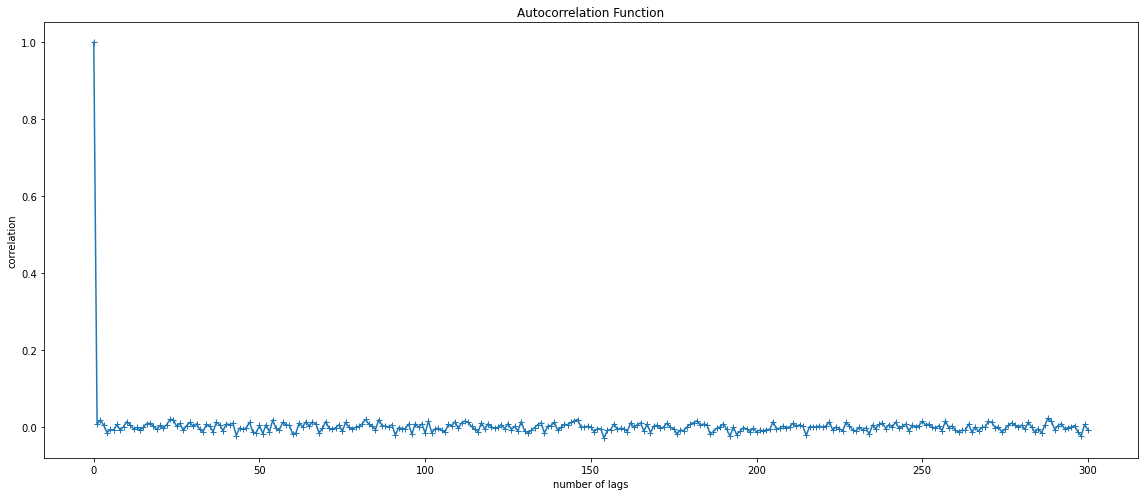

In [196]:
lag_acf = acf(target, nlags=300)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')
# plt.axhline(target=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

<Figure size 1152x504 with 0 Axes>

Text(0.5, 1.0, 'Partial Autocorrelation Function')

Text(0.5, 0, 'Number of lags')

Text(0, 0.5, 'correlation')

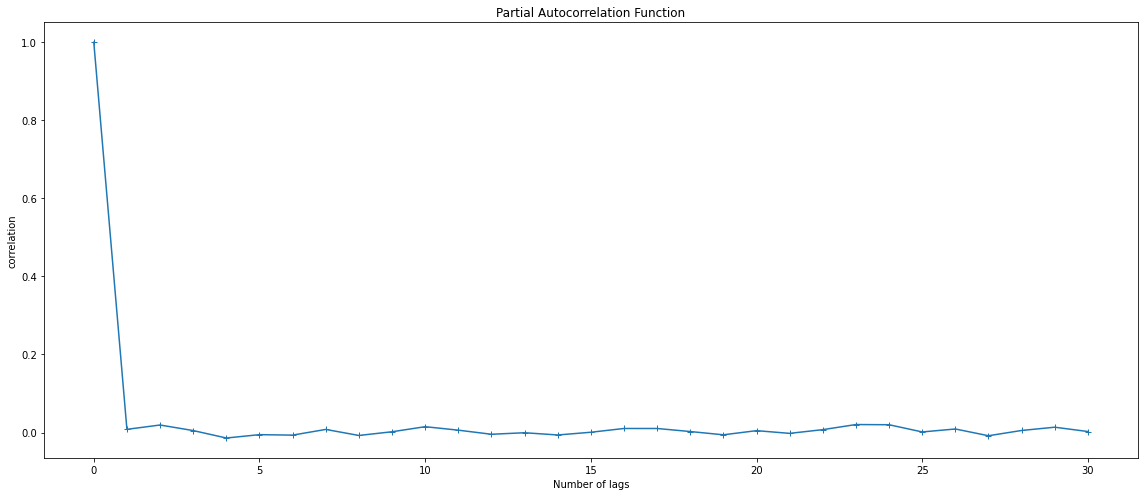

In [197]:
#calling partial correlation function
lag_pacf = pacf(target, nlags=30, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')
# plt.axhline(y=0,linestyle='--',color='gray')
# plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
# plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('Number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In [198]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# q = 2
# p=0
arima_model =ARIMA(target)

In [239]:
x_variables

Index(['776', '618', '206', '158', '732', '871', '292', '640', '442', '749',
       '938', '10', '403', '260', '881', '211', '268', '869', '775', '178',
       '559', '463', '552', '81', '955', '410', '184', '642', '173', '762',
       '920', '811', '910', '612', '720', '450', '844', '25', '3', '441',
       '120'],
      dtype='object')

In [240]:
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [300, 500,800],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2, 3, 5]
}
tscv = TimeSeriesSplit(n_splits=4)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2', n_jobs = -1, verbose=1)
gsearch.fit(xtrain[x_variables], ytrain)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   41.6s finished
C:\Users\sarahwang\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=4),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [300, 500, 800]},
             scoring='r2', verbose=1)

In [241]:
best_score

0.0026695467631385472

In [242]:
best_model

RandomForestRegressor(max_depth=5, max_features='log2', n_estimators=300)

In [247]:
best_model_pred = best_model.predict(xtest[x_variables])
model_evaluation(ytrue = ytest, ypred = best_model_pred, model_name='Random Forest Regression Best Model', 
                 num_observations =xtest.shape[0],num_features=len(x_variables) )

***Random Forest Regression Best Model***
R squared:  -0.001072983226224622
Adjusted R squared:  -0.014948572243220992
MSE:  0.9887933244468425
MAE:  0.7905823011699862


In [248]:
best_model_train_pred = best_model.predict(xtrain[x_variables])
model_evaluation(ytrue = ytrain, ypred = best_model_train_pred, model_name='Random Forest Regression Best Model Train', 
                 num_observations =xtrain.shape[0],num_features=len(x_variables) )

***Random Forest Regression Best Model Train***
R squared:  0.05554485633391615
Adjusted R squared:  0.04997965643591251
MSE:  0.9373177678668598
MAE:  0.775704137580278


<AxesSubplot:title={'center':'ytest Cumsum Plot'}>

<AxesSubplot:title={'center':'random_forest_best_model_pred Cumsum Plot'}>

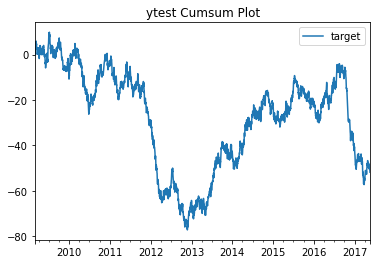

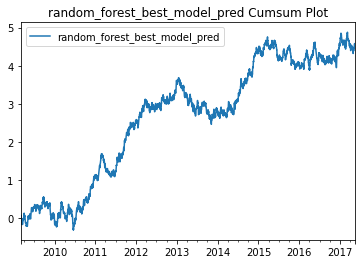

In [245]:
rf_best_model_pred_df = pd.DataFrame(best_model_pred, columns = ['random_forest_best_model_pred'], index = ytest.index)

ytest.cumsum().plot(title = 'ytest Cumsum Plot')
rf_best_model_pred_df.cumsum().plot(title = 'random_forest_best_model_pred Cumsum Plot')

In [254]:
residual = ytest.values - rf_best_model_pred_df.values
residual = pd.DataFrame(residual, index =ytest.index, columns = ['residual'] )
residual

,residual
2009-03-02,1.077904
2009-03-03,-0.126230
2009-03-04,-1.150333
2009-03-05,1.648207
2009-03-06,0.778751
...,...
2017-05-14,-0.853980
2017-05-15,-1.219507
2017-05-16,-0.215881
2017-05-17,-0.185681


<AxesSubplot:ylabel='Frequency'>

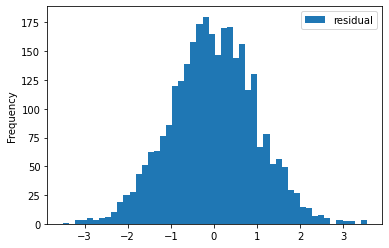

In [259]:
residual.plot.hist(bins = 50)

In [205]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [215]:
fstats, pvalue = f_regression(xtrain, ytrain)
ftest = pd.DataFrame({'fstats': fstats, 'pvalue': pvalue}, index = xtrain.columns).sort_values('pvalue')
x_variables = ftest.loc[ftest.pvalue<0.05].index
x_variables
xtrain[x_variables]

C:\Users\sarahwang\AppData\Local\conda\conda\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Index(['776', '618', '206', '158', '732', '871', '292', '640', '442', '749',
       '938', '10', '403', '260', '881', '211', '268', '869', '775', '178',
       '559', '463', '552', '81', '955', '410', '184', '642', '173', '762',
       '920', '811', '910', '612', '720', '450', '844', '25', '3', '441',
       '120'],
      dtype='object')

,776,618,206,158,732,871,292,640,442,749,...,811,910,612,720,450,844,25,3,441,120
1990-01-01,-0.227936,-0.465178,-0.297621,1.006404,-1.093437,-0.649001,0.550444,1.774194,-1.515944,-0.561594,...,-0.781709,0.679142,0.869582,-0.308881,-0.467963,0.667437,1.510890,-1.073370,2.597097,0.126553
1990-01-02,-0.481188,1.041773,-1.026740,-0.688632,-0.439581,1.207707,1.087907,-0.234648,-0.197094,-0.784893,...,2.897564,1.220027,1.171265,0.981322,0.153408,-1.010582,0.373260,-0.256779,-0.363739,-1.521836
1990-01-03,1.138508,0.718281,-0.026192,-0.438797,-0.686851,-0.568006,-1.847071,-0.435950,-0.394541,0.662450,...,0.671237,-1.281614,-0.341883,-0.134791,0.510233,0.879878,1.391711,0.831892,-0.006696,-0.223706
1990-01-04,1.025163,1.072114,-0.515886,-0.443972,1.622397,0.862189,-0.126787,-0.731898,1.111505,0.222222,...,0.139765,-0.449534,-0.446463,1.737954,-0.062258,-0.943142,-1.565731,-1.579936,-0.777419,-0.616974
1990-01-05,-1.433555,0.829255,0.568712,0.457004,-0.597979,0.090619,-0.255352,1.856786,0.620677,-1.064848,...,-1.355073,-1.037848,-1.163756,-0.996904,1.544343,0.312428,0.326067,0.841819,0.207968,-0.813711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-02-25,-0.496776,-1.377735,-1.434283,0.234319,-0.772271,-0.576828,-1.358618,-1.504761,0.108626,-0.655701,...,-0.693702,-0.397487,-1.078521,0.492806,1.778749,-1.200872,0.387955,1.508573,-0.842099,-0.128645
2009-02-26,1.999662,1.032523,-1.040431,0.109480,0.247721,-0.860788,0.379328,0.433720,-1.512855,-1.038427,...,0.619705,0.080372,-0.334387,0.620365,0.439018,0.269475,-0.642235,-0.882363,-1.183506,1.148939
2009-02-27,0.083271,0.427335,0.726494,-0.367107,0.466143,-0.056467,0.420905,0.442335,0.005255,-0.983236,...,0.888475,0.941677,-0.499180,1.396125,0.698548,0.066974,-1.314761,2.068186,1.084416,0.683559
2009-02-28,-0.335527,0.066635,0.863913,-0.416191,0.150348,-1.873555,-0.881923,0.958165,0.020666,-0.184098,...,1.587274,0.411482,-0.654921,-1.917692,2.099153,-0.436519,-0.423449,0.290391,0.577946,-1.094103


In [229]:
rf_model = RandomForestRegressor(n_estimators = 500,max_depth =5,min_samples_leaf = 5, n_jobs=-1, verbose=1)

rf_model.fit(xtrain[x_variables], ytrain)
rf_model_pred = rf_model.predict(xtest[x_variables])
model_evaluation(ytrue = ytest, ypred = rf_model_pred, model_name='Random Forest Regression with Dim Reduction', 
                 num_observations =len(xtest.index),num_features=len(x_variables) )

C:\Users\sarahwang\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.6s finished


RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=500,
                      n_jobs=-1, verbose=1)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.1s finished


***Random Forest Regression with Dim Reduction***
R squared:  -0.002867729596797597
Adjusted R squared:  -0.016768195084785553
MSE:  0.9905660555663844
MAE:  0.7916142989326028


<AxesSubplot:title={'center':'ytest Cumsum Plot'}>

<AxesSubplot:title={'center':'random_forest_model_reduced_pred Cumsum Plot'}>

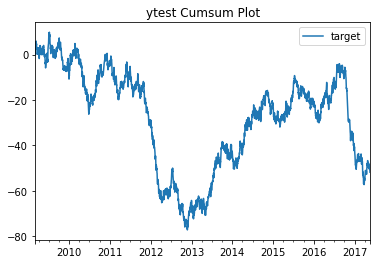

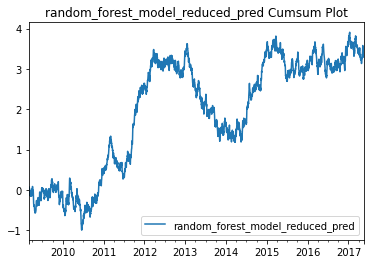

In [228]:
rf_model_reduced_pred_df = pd.DataFrame(rf_model_pred, columns = ['random_forest_model_reduced_pred'], index = ytest.index)

ytest.cumsum().plot(title = 'ytest Cumsum Plot')
rf_model_reduced_pred_df.cumsum().plot(title = 'random_forest_model_reduced_pred Cumsum Plot')

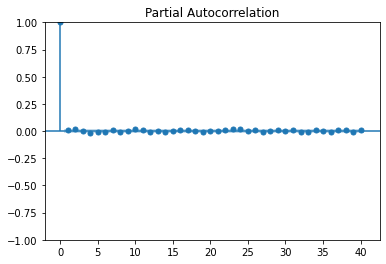

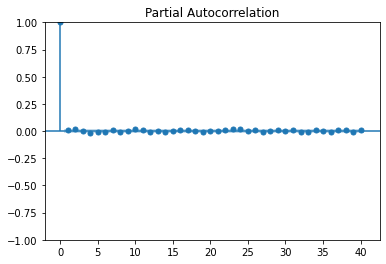

In [218]:
sm.graphics.tsa.plot_pacf(target, lags=40, method="ywm")
plt.show()